In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import pickle #to save notebook at sessions
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# This script does two things:
## 1. Identifies and visualizes top predictive glycogenes shared amongst all 20 glycgoene models generated from TIL/LN
## 2. Visualizes T cell type composition from all T cells in the tumor and lymph nodes

# Identifying top predictive glycogenes shared amongst 10 models (1 full T cell, 9 T cell type specific) for each environment (TIL/LN)
10 models are the glycogene no housekeeping models for each subtype and all cells

In [11]:
# Import top features of full T cell population glycogene model
TILfeat_df1 = pd.read_csv('fullTIL nohk glycogene model top features.csv')
LNfeat_df1 = pd.read_csv('fullLN nohk glycogene model top features.csv')

#ensure they're ranked by importance values
TILfeat_df1= TILfeat_df1.sort_values(by='importance', ascending=False)
LNfeat_df1=LNfeat_df1.sort_values(by='importance', ascending=False)

In [12]:
#get list of top 3 glycogenes that are predictive of model 
fullTIL_top3 = list(TILfeat_df1.head(3)['feature'])
fullLN_top3 = list(TILfeat_df1.head(3)['feature'])

In [13]:
# pickle in dictionary containing feature dfs from TIL and LN subtype models 
# (from Generating Random Forest Classifier script)
pickle_in = open("TILsubtype_featdfs.pkl","rb")
TILsubtype_featdfs = pickle.load(pickle_in)
pickle_in = open("LNsubtype_featdfs.pkl","rb")
LNsubtype_featdfs = pickle.load(pickle_in)

In [128]:
'''For TIL top three predictive glycogenes'''

#make dictionary for top 1,2,3
top1 = {}
top2 = {}
top3 = {}
for key in keys:
    gene1 = TILsubtype_featdfs[key].split(",")[0].split(':')[0][2:] #isolates gene name
    gene2 = TILsubtype_featdfs[key].split(",")[1].split(':')[0][2:] #isolates gene name
    gene3 = TILsubtype_featdfs[key].split(",")[2].split(':')[0][2:] #isolates gene name
    if gene1 not in top1.keys():
        top1[gene1]=1
    else:
        top1[gene1] +=1
    
    if gene2 not in top2.keys():
        top2[gene2]=1
    else:
        top2[gene2] +=1
    
    if gene3 not in top3.keys():
        top3[gene3]=1
    else:
        top3[gene3] +=1 

TILlabels1 = top1.keys()
TILsizes1 = top1.values()

TILlabels2 = top2.keys()
TILsizes2 = top2.values()

TILlabels3 = top3.keys()
TILsizes3 = top3.values()

#make color dictionary
TILcolor_dict = {}
labels = [TILlabels1, TILlabels2, TILlabels3]
for label in labels:
    key_list = list(label)
    for key in key_list:
        if key not in TILcolor_dict.keys():
            TILcolor_dict[key]=None

{'B4galnt1': (0.6509803921568628, 0.807843137254902, 0.8901960784313725, 1.0),
 'Ugcg': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765, 1.0),
 'St8sia4': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353, 1.0),
 'B4galt1': (0.2, 0.6274509803921569, 0.17254901960784313, 1.0),
 'Galnt1': (0.984313725490196, 0.6039215686274509, 0.6, 1.0),
 'Chst12': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745, 1.0),
 'Lfng': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883, 1.0),
 'Dpm2': (1.0, 0.4980392156862745, 0.0, 1.0),
 'Ogt': (0.792156862745098, 0.6980392156862745, 0.8392156862745098, 1.0),
 'Stt3a': (0.41568627450980394, 0.23921568627450981, 0.6039215686274509, 1.0),
 'B3gnt2': (1.0, 1.0, 0.6, 1.0),
 'Stt3b': (0.6941176470588235, 0.34901960784313724, 0.1568627450980392, 1.0)}

In [200]:
'''For LN top three predicting glycogenes'''

#make dictionary for top 1,2,3
top1 = {}
top2 = {}
top3 = {}
for key in keys:
    gene1 = LNsubtype_featdfs[key].split(",")[0].split(':')[0][2:] #isolates gene name
    gene2 = LNsubtype_featdfs[key].split(",")[1].split(':')[0][2:] #isolates gene name
    gene3 = LNsubtype_featdfs[key].split(",")[2].split(':')[0][2:] #isolates gene name
    if gene1 not in top1.keys():
        top1[gene1]=1
    else:
        top1[gene1] +=1
    
    if gene2 not in top2.keys():
        top2[gene2]=1
    else:
        top2[gene2] +=1
    
    if gene3 not in top3.keys():
        top3[gene3]=1
    else:
        top3[gene3] +=1 

LNlabels1 = top1.keys()
LNsizes1 = top1.values()

LNlabels2 = top2.keys()
LNsizes2 = top2.values()

LNlabels3 = top3.keys()
LNsizes3 = top3.values()

#make color dictionary
labels = [LNlabels1, LNlabels2, LNlabels3]
for label in labels:
    key_list = list(label)
    for key in key_list:
        if key not in color_dict.keys():
            color_dict[key]=None

# assign colors as value to color dictionary manually to prevent non-conservation of colormapping
# cmap = sns.color_palette("Spectral", n_colors=n)
cmap = sns.color_palette("coolwarm", n_colors=n)
cmap = sns.diverging_palette(220, 20, n = n)

cmap = sns.diverging_palette(220, 20, n=n)
n = len(LNcolor_dict.keys())


# create a ListedColormap object with n colors
colors = [cmap[i] for i in range(n)]
list_cmap = mcolors.ListedColormap(colors)

#assign a color to each gene that appears in the SIX pie charts
for key, color in zip(color_dict.keys(), colors):
    color_dict[key] = color 


{'B4galnt1': (0.24715576253545807, 0.49918708160096675, 0.5765599057376697),
 'Ugcg': (0.34468627333121427, 0.5624084683112157, 0.6294673746556183),
 'St8sia4': (0.44221678412697046, 0.6256298550214647, 0.6823748435735669),
 'B4galt1': (0.5397472949227267, 0.6888512417317136, 0.7352823124915155),
 'Galnt1': (0.6453947655470793, 0.757334217374988, 0.792592996324836),
 'Chst12': (0.7429252763428356, 0.8205556040852368, 0.8455004652427847),
 'Lfng': (0.8404557871385918, 0.8837769907954858, 0.8984079341607333),
 'Dpm2': (0.9500463204266012, 0.9458771880685795, 0.945349903258932),
 'Ogt': (0.924371914496006, 0.8581356111320103, 0.8422135595757048),
 'Stt3a': (0.8979225863284979, 0.7721138101114223, 0.7408986679461249),
 'B3gnt2': (0.8714732581609897, 0.6860920090908339, 0.6395837763165448),
 'Stt3b': (0.8428226892486379, 0.5929110586146479, 0.5298369704204839),
 'Galnt6': (0.8163733610811298, 0.5068892575940598, 0.4285220787909039),
 'Fut8': (0.7899240329136216, 0.4208674565734716, 0.327207

NameError: name 'TILsizes1' is not defined

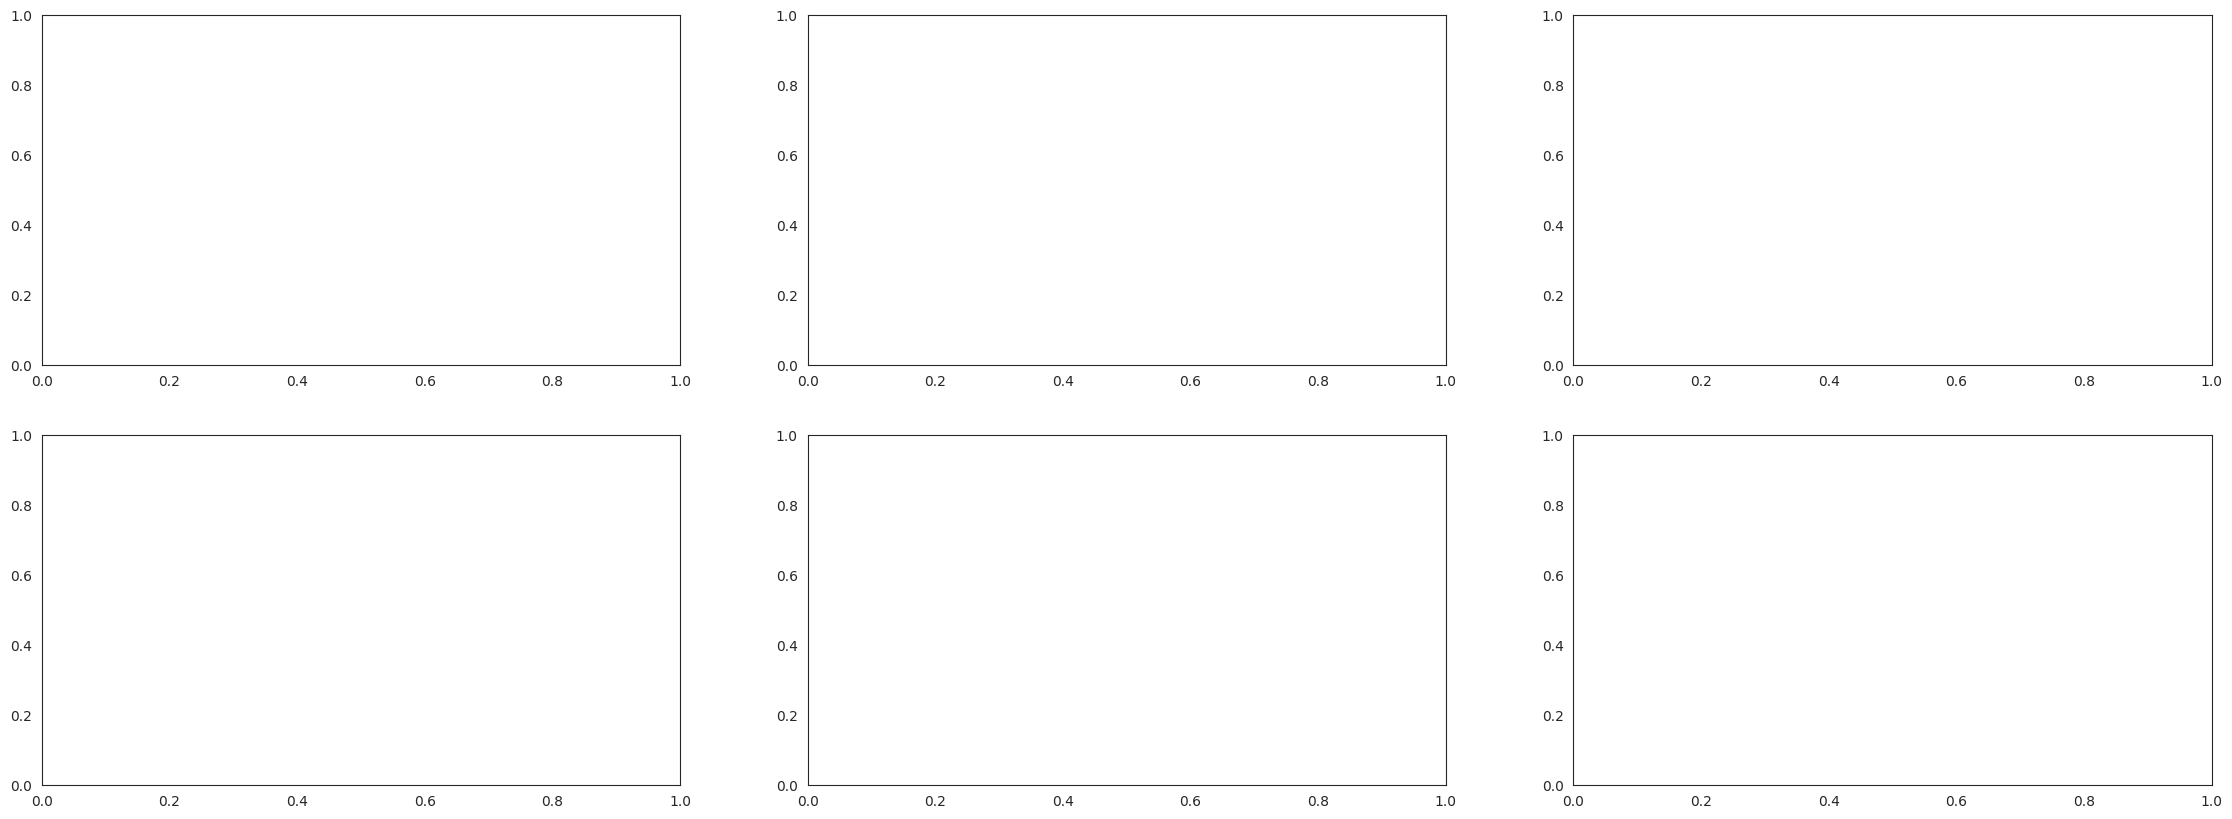

In [49]:
'''
PLOTTING TOP GLYCOGENES FOR TIL MODELS VIA PIE CHARTS
'''
fig, axs = plt.subplots(2, 3, figsize=(28, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()

# top predictor glycogenes for TILs
_, label1, text1= ax1.pie(TILsizes1, labels=TILlabels1, colors=[color_dict.get(l, 'grey') for l in TILlabels1],  autopct='%.0f%%')
_, label2, text2= ax2.pie(TILsizes2, labels=TILlabels2, colors=[color_dict.get(l, 'grey') for l in TILlabels2], autopct='%.0f%%')
_, label3, text3= ax3.pie(TILsizes3, labels=TILlabels3, colors=[color_dict.get(l, 'grey') for l in TILlabels3], autopct='%.0f%%')
# top predictor glycogenes for LNs
_, label4, text4=ax4.pie(LNsizes1, labels=LNlabels1, colors=[color_dict.get(l, 'grey') for l in LNlabels1], autopct='%.0f%%')
_, label5, text5=ax5.pie(LNsizes2, labels=LNlabels2, colors=[color_dict.get(l, 'grey') for l in LNlabels2], autopct='%.0f%%')
_, label6, text6=ax6.pie(LNsizes3, labels=LNlabels3, colors=[color_dict.get(l, 'grey') for l in LNlabels3], autopct='%.0f%%')

#set titles
ax1.set_title('Top predictive glycogene for TILs', fontsize = 20, weight = 'bold')
ax2.set_title('2nd most predictive glycogene for TILs', fontsize = 20, weight = 'bold')
ax3.set_title('3rd most predictive glycogene for TILs', fontsize = 20, weight = 'bold')
ax4.set_title('Top predictive glycogene for LNs', fontsize = 20, weight = 'bold')
ax5.set_title('2nd most predictive glycogene for LNs', fontsize = 20, weight = 'bold')
ax6.set_title('3rd most predictive glycogene for LNs', fontsize = 20, weight = 'bold')

texts = [text1, text2, text3, text4, text5, text6]
labels = [label1, label2, label3, label4, label5, label6]
for text in texts:
    for t in text:
        t.set_fontsize(12)
        t.set_weight('bold')
for label in labels:
    for l in label:
        l.set_fontsize(16)
#         l.set_weight('bold')
        
    
# set seaborn style
sns.set_style("white")
# sns.set_palette(colors)

# show the plot
plt.tight_layout()
plt.savefig('Most predictive glycogenes pie chart.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Identifying T cell type composition of T cell population from TIL and LN

In [6]:
# FULL dataset, normalized down each cell 
pickle_in = open("normTIL_full.pkl","rb")
normTIL_full = pickle.load(pickle_in)
pickle_in = open("normLN_full.pkl","rb")
normLN_full = pickle.load(pickle_in)

In [7]:
# dictionaries containing dataframes of each t-cell subtype, normalized but not glycoscored (not cut in half)
pickle_in = open("TILnorm_dfs_sub.pkl","rb")
TILtcell_dfs_sub = pickle.load(pickle_in)
pickle_in = open( "LNnorm_dfs_sub.pkl","rb")
LNtcell_dfs_sub = pickle.load(pickle_in)

In [9]:
cols = {'T-cell subtype':[], 'Count':[]}
TIL_counts = pd.DataFrame(columns = cols)

for subtype in TILtcell_dfs_sub.keys():
    count = len(TILtcell_dfs_sub[subtype])
    TIL_counts.loc[len(TIL_counts.index)] = [subtype, count] 

print('Total number of TIL T-cells:', len(normTIL_full))
print('Total number of T-cells found in TIL subtype dictionary:', sum(TIL_counts['Count']))

Total number of TIL T-cells: 19645
Total number of T-cells found in TIL subtype dictionary: 19645


In [10]:
cols = {'T-cell subtype':[], 'Count':[]}
LN_counts = pd.DataFrame(columns = cols)

for subtype in LNtcell_dfs_sub.keys():
    count = len(LNtcell_dfs_sub[subtype])
    LN_counts.loc[len(LN_counts.index)] = [subtype, count] 

print('Total number of LN T-cells:', len(normLN_full))
print('Total number of T-cells found in LN subtype dictionary:', sum(LN_counts['Count']))

Total number of LN T-cells: 21296
Total number of T-cells found in LN subtype dictionary: 21296


In [11]:
#remove '_df' from all of the subtype names.
counts_tables = [TIL_counts, LN_counts]
for df in counts_tables:
    df['T-cell subtype'] = df['T-cell subtype'].str.remove('_df')

In [12]:
#make color dictionary
color_dict = {}
labels = list(LN_counts['T-cell subtype'])
for label in labels:
    color_dict[label]=None

# assign colors as value to color dictionary manually to prevent non-conservation of colormapping
n = len(LNtcell_dfs_sub.keys())
cmap = sns.color_palette("coolwarm", n_colors=n)
# cmap = sns.diverging_palette(220, 20, n = n)

# create a ListedColormap object with n colors
colors = [cmap[i] for i in range(n)]
list_cmap = mcolors.ListedColormap(colors)

#assign a color to each gene that appears in the SIX pie charts
for key, color in zip(color_dict.keys(), colors):
    color_dict[key] = color 


{'Treg': (0.34832334141176474, 0.4657111465098039, 0.8883461629411764),
 'Th1': (0.48385432959999997, 0.6220498496, 0.9748082026),
 'CD8_EarlyActiv': (0.6193179451882354,
  0.7441207347647059,
  0.9989309188196078),
 'CD8_NaiveLike': (0.753610618, 0.830232851, 0.960871157),
 'CD8_Tex': (0.8674276350862745, 0.864376599772549, 0.8626024620196079),
 'CD8_EffectorMemory': (0.9473454036, 0.7946955048, 0.7169905058),
 'CD8_Tpex': (0.9684997476666667, 0.673977379772549, 0.5566492560470588),
 'CD4_NaiveLike': (0.9318312966, 0.5190855232, 0.4064796086),
 'Tfh': (0.8393649370784314, 0.32185622094117644, 0.26492398098039216)}

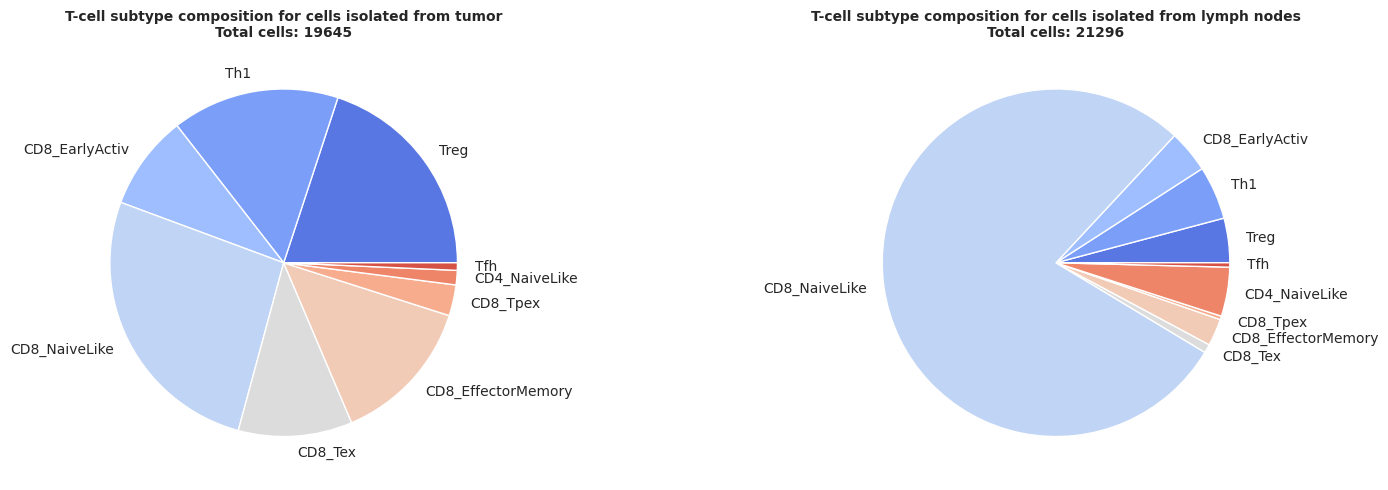

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.pie(TIL_counts['Count'], labels=TIL_counts['T-cell subtype'], 
        colors=[color_dict[label] for label in labels], autopct='')
ax2.pie(LN_counts['Count'], labels=LN_counts['T-cell subtype'], 
        colors=[color_dict[label] for label in labels], autopct='')

#set titles
ax1.set_title('T-cell subtype composition for cells isolated from tumor\nTotal cells: 19645', 
              fontsize = 10, weight = 'bold')
ax2.set_title('T-cell subtype composition for cells isolated from lymph nodes\nTotal cells: 21296', 
              fontsize = 10, weight = 'bold')      
  
# plt.title('Really Important Plot\nThis is why it is important')

#set legends
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# set seaborn style
sns.set_style("white")
sns.set_palette(colors)

# show the plot
plt.tight_layout()

plt.savefig('T-cell composition.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()